In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
def get_csv_files(directory):
    """Recursively get all CSV files in directory and subdirectories"""
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def read_csv_with_comments(filepath):
    """Read CSV file, handling comment lines at the start"""
    # Count comment lines to skip
    with open(filepath, 'r') as f:
        skip_lines = 0
        for line in f:
            if line.startswith('#'):
                skip_lines += 1
            else:
                break
                
    # Read CSV skipping comment lines
    return pd.read_csv(filepath, skiprows=skip_lines)

# Get all CSV files recursively
data_dir = Path("../data/2022hc_cb6_22m/inputs")
csv_files = get_csv_files(data_dir)

# Print directory tree structure
print("Data directory structure:")
for root, dirs, files in os.walk(data_dir):
    level = root.replace(str(data_dir), '').count(os.sep)
    indent = '  ' * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = '  ' * (level + 1)
    for f in files:
        if f.endswith('.csv'):
            print(f"{subindent}{f}")

# Read and concatenate all CSV files
dataframes = []
for i, csv_file in enumerate(csv_files):
    try:
        print(f"{i}/{len(csv_files)}: Reading {csv_file}")
        df = read_csv_with_comments(csv_file)
        dataframes.append(df)
        print(f"Successfully read: {csv_file}")
    except Exception as e:
        print(f"Error reading {csv_file}: {str(e)}")

if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Remove rows that are all NaN
    combined_df = combined_df.dropna(how='all')
    # Convert scc to integer and stkhgt to float
    combined_df['scc'] = combined_df['scc'].astype('Int64')  # Int64 allows for NaN values
    combined_df['stkhgt'] = combined_df['stkhgt'].astype('float64')
    print(f"\nCombined {len(dataframes)} CSV files into dataframe with shape: {combined_df.shape}")
else:
    print("\nNo CSV files were successfully read")


Data directory structure:
inputs/
  ptegu/
    egu_cems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv
    egu_noncems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv
  pt_oilgas/
    cy2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
    cy2021_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
    cy2020_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
  ptnonipm/
    2022v1_platform_railyards_2022_27jun2024_nf_v2.csv
    nonegu_norail_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
  airports/
    2022proj_airports_2022_point_20240626_top51_adjusted_26jun2024_v0.csv
0/8: Reading ../data/2022hc_cb6_22m/inputs/ptegu/egu_cems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,8,10,29,32,41,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/ptegu/egu_cems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv
1/8: Reading ../data/2022hc_cb6_22m/inputs/ptegu/egu_noncems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,10,29,32,42) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/ptegu/egu_noncems_2022_POINT_20240615_2022cems_stackfix2_23jul2024_v0.csv
2/8: Reading ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,8,9,10,28,29,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
3/8: Reading ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2021_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,28,29,32,33,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2021_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
4/8: Reading ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2020_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,8,28,29,32,33,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/pt_oilgas/cy2020_proj2022_oilgas_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
5/8: Reading ../data/2022hc_cb6_22m/inputs/ptnonipm/2022v1_platform_railyards_2022_27jun2024_nf_v2.csv
Successfully read: ../data/2022hc_cb6_22m/inputs/ptnonipm/2022v1_platform_railyards_2022_27jun2024_nf_v2.csv
6/8: Reading ../data/2022hc_cb6_22m/inputs/ptnonipm/nonegu_norail_2022_POINT_20240615_stackfix2_23jul2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (3,12,37,40,41,76) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)
/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,8,9,10,28,29,32,40,42,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/ptnonipm/nonegu_norail_2022_POINT_20240615_stackfix2_23jul2024_v0.csv
7/8: Reading ../data/2022hc_cb6_22m/inputs/airports/2022proj_airports_2022_point_20240626_top51_adjusted_26jun2024_v0.csv


/var/folders/k3/b763wg095j90n1tmvrb4fl480000gn/T/ipykernel_41542/3271458609.py:22: DtypeWarning: Columns (7,50) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath, skiprows=skip_lines)


Successfully read: ../data/2022hc_cb6_22m/inputs/airports/2022proj_airports_2022_point_20240626_top51_adjusted_26jun2024_v0.csv

Combined 8 CSV files into dataframe with shape: (9830166, 77)


In [3]:
len(combined_df)

9830166

In [4]:
data_dir = Path("../data")
filename = "SCCDownload-2025-0708-202427.csv"
filepath = data_dir / filename
df_scc = pd.read_csv(filepath)

In [5]:
def filter_scc_data(df: pd.DataFrame, keywords: str | list[str] | None = None, scc_level: int | None = None) -> pd.DataFrame:
    """
    Filter SCC data based on data category, status and optional keyword search in SCC levels
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing SCC data
    keywords : str or list of str, optional
        One or more keywords to search in specified SCC level
    scc_level : int, optional
        Which SCC level to search keyword in. Must be one of: 1, 2, 3, 4
        
    Returns:
    --------
    pandas.DataFrame
        Filtered dataframe
    """
    # Basic filters
    filtered_df = df[
        (df["data category"] == "Point") &
        (df["status"] == "Active")
    ]
    
    # Apply keyword filter if both keywords and scc_level are provided
    if keywords and scc_level:
        level_map = {1: 'one', 2: 'two', 3: 'three', 4: 'four'}
        if scc_level not in level_map:
            raise ValueError(f"scc_level must be one of {list(level_map.keys())}")
            
        scc_level_str = f"scc level {level_map[scc_level]}"
        
        # Convert single keyword to list
        if isinstance(keywords, str):
            keywords = [keywords]
            
        # Filter for any of the keywords
        mask = filtered_df[scc_level_str].str.contains(keywords[0], case=False, na=False)
        for keyword in keywords[1:]:
            mask |= filtered_df[scc_level_str].str.contains(keyword, case=False, na=False)
        filtered_df = filtered_df[mask]
        
        # Print unique values after filtering, one per line
        print(f"\nUnique values in {scc_level_str} after filtering:")
        for i, value in enumerate(sorted(filtered_df[scc_level_str].unique())):
            print(f"{i+1}: {value}")
    
    return filtered_df

filtered_df = filter_scc_data(df_scc, keywords=["steel", "iron"], scc_level=3)

scc_set = set(filtered_df['SCC'].astype(int))


Unique values in scc level three after filtering:
1: Grey Iron Foundries
2: Integrated Iron and Steel Manufacturing
3: Malleable Iron
4: Steel Drums
5: Steel Foundries
6: Steel Manufacturing
7: Steel Manufacturing (See 3-03-015 for Integrated Iron & Steel MACT)
8: Taconite Iron Ore Processing


In [6]:
def filter_poll_data(df: pd.DataFrame, poll: str, scc_set: set) -> pd.DataFrame:
    """
    Filter dataframe for specific pollutant and valid stack heights, limiting to provided SCCs
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe to filter
    poll : str
        Pollutant to filter for
    scc_set : set
        Set of SCC codes to filter for
        
    Returns
    -------
    pandas.DataFrame
        Filtered dataframe
    """
    filtered_df = df[
        (df.poll == poll) &
        (df.stkhgt.notna()) &
        (df["scc"].isin(scc_set))
    ]
    
    return filtered_df

In [7]:
filter_poll_data(combined_df, "PM25-PRI", scc_set)['stkhgt']

348696       5.0
3243066    125.0
3244341     40.0
3326239     68.3
3327268     36.6
           ...  
9156410      1.0
9156427      1.0
9156446      1.0
9157277      1.0
9161971      1.0
Name: stkhgt, Length: 6589, dtype: float64

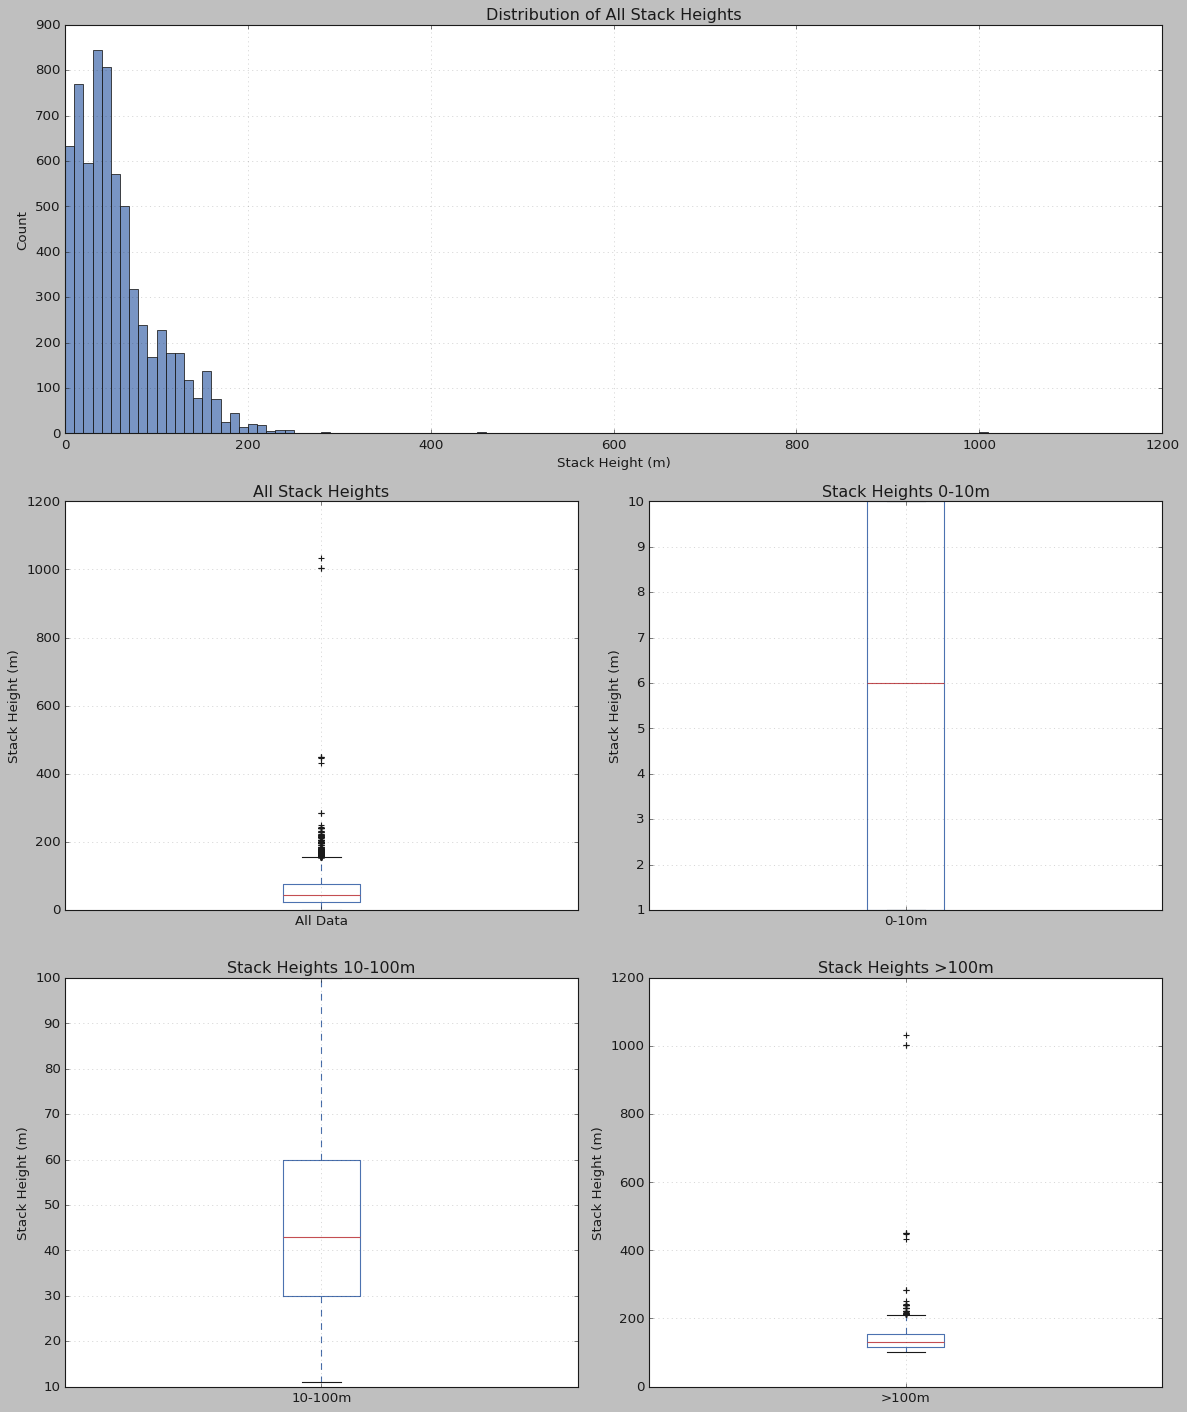


Summary statistics by category:

All data:
count    6589.000000
mean       56.173987
std        50.582459
min         0.000000
25%        23.000000
50%        43.500000
75%        75.500000
max      1033.000000
Name: stkhgt, dtype: float64

Category 0-10:
count    979.000000
mean       5.865577
std        3.943392
min        1.000000
25%        1.000000
50%        6.000000
75%       10.000000
max       10.000000
Name: stkhgt, dtype: float64

Category 10-100:
count    4513.000000
mean       47.249679
std        22.087266
min        11.000000
25%        30.000000
50%        43.000000
75%        60.000000
max       100.000000
Name: stkhgt, dtype: float64

Category >100:
count    1057.000000
mean      142.999243
std        59.255322
min       101.000000
25%       117.500000
50%       131.200000
75%       155.500000
max      1033.000000
Name: stkhgt, dtype: float64


In [9]:
plt.style.use('classic')
# Create bins for stack height categories
stkhgt_data = filter_poll_data(combined_df, "PM25-PRI", scc_set)['stkhgt']
categories = pd.cut(stkhgt_data, 
                   bins=[0, 10, 100, float('inf')],
                   labels=['0-10', '10-100', '>100'])

# Create subplots - now 3 rows, 2 columns
fig = plt.figure(figsize=(15, 18))
gs = fig.add_gridspec(3, 2)

# Distribution plot taking full width of top row
ax_dist = fig.add_subplot(gs[0, :])
# Modified to use bins with increment of 10
max_height = int(stkhgt_data.max() // 10 * 10 + 10)  # Round up to nearest 10
bins = range(0, max_height + 10, 10)  # Create bins from 0 to max in steps of 10
sns.histplot(data=stkhgt_data, ax=ax_dist, bins=bins)
ax_dist.set_title('Distribution of All Stack Heights')
ax_dist.set_xlabel('Stack Height (m)')
ax_dist.set_ylabel('Count')
ax_dist.grid(True, alpha=0.3)

# Box plots in bottom two rows
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])

# Plot 1: All data
ax1.boxplot(stkhgt_data, tick_labels=['All Data'])
ax1.set_title('All Stack Heights')
ax1.set_ylabel('Stack Height (m)')
ax1.grid(True, alpha=0.3)

# Plot 2: 0-10 range
ax2.boxplot(stkhgt_data[categories == '0-10'], tick_labels=['0-10m'])
ax2.set_title('Stack Heights 0-10m')
ax2.set_ylabel('Stack Height (m)')
ax2.grid(True, alpha=0.3)

# Plot 3: 10-100 range
ax3.boxplot(stkhgt_data[categories == '10-100'], tick_labels=['10-100m'])
ax3.set_title('Stack Heights 10-100m')
ax3.set_ylabel('Stack Height (m)')
ax3.grid(True, alpha=0.3)

# Plot 4: >100 range
ax4.boxplot(stkhgt_data[categories == '>100'], tick_labels=['>100m'])
ax4.set_title('Stack Heights >100m')
ax4.set_ylabel('Stack Height (m)')
ax4.grid(True, alpha=0.3)

plt.suptitle('', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

# Print summary statistics for each category
print("\nSummary statistics by category:")
print("\nAll data:")
print(stkhgt_data.describe())
for category in ['0-10', '10-100', '>100']:
    print(f"\nCategory {category}:")
    print(stkhgt_data[categories == category].describe())

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
